In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 - Reading the Data

In [2]:
import os

In [3]:
data_dir = "C:\\Users\\rando\Desktop\\Data Science\\Udemy - Neural Networks\\cell_images"

In [4]:
# to check if the directory is correct
os.listdir(data_dir)

['test', 'train']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + "\\test\\"
train_path = data_dir + "\\train\\"

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
# look at a single image
os.listdir(train_path + "parasitized")[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
infected = imread(train_path + "parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png")

In [21]:
infected.shape

(148, 142, 3)

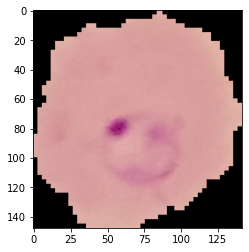

In [22]:
plt.imshow(infected);

In [23]:
os.listdir(train_path + "uninfected")[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [25]:
uninfected = imread(train_path + "uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png")

In [26]:
uninfected.shape

(139, 160, 3)

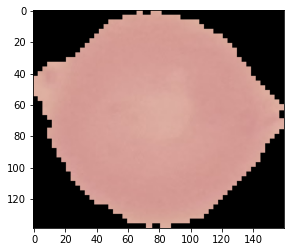

In [28]:
plt.imshow(uninfected);

In [30]:
# number of pictures in training set
print(len(os.listdir(train_path + "parasitized")))
print(len(os.listdir(train_path + "uninfected")))

12480
12480


In [31]:
# number of pictures in test set
print(len(os.listdir(test_path + "parasitized")))
print(len(os.listdir(test_path + "uninfected")))

1300
1300


In [33]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + "uninfected"):
    
    img = imread(test_path + "uninfected\\" + image_filename)
    d1, d2, colors = img.shape
    
    dim1.append(d1)
    dim2.append(d2)

C:\Users\rando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


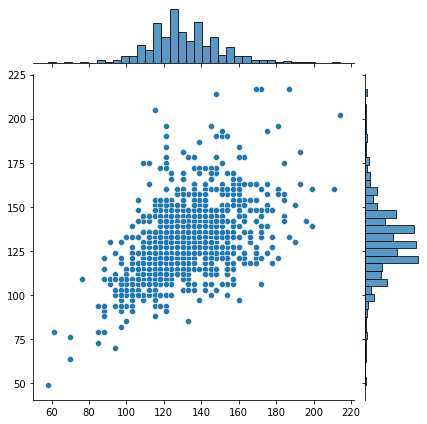

In [36]:
sns.jointplot(dim1, dim2);

In [37]:
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [40]:
# best to use average of image sizes
image_shape = (130, 130, 3)

# Part 2 - Data Processing

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# makes sense to apply these transformations on the images becuase they are blood cells, they could be in any random position
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

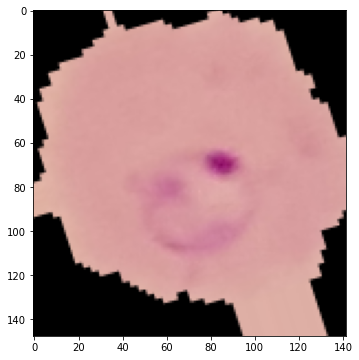

In [55]:
plt.figure(figsize=(10, 6))
plt.imshow(image_gen.random_transform(infected));

In [58]:
image_gen.flow_from_directory(train_path);

Found 24958 images belonging to 2 classes.


In [59]:
image_gen.flow_from_directory(test_path);

Found 2600 images belonging to 2 classes.


# Part 3 - Creating the Model

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [64]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
stopper = EarlyStopping(monitor="val_loss", patience=2)

In [67]:
batch_size=16

In [68]:
train_gen = image_gen.flow_from_directory(train_path, 
                                          target_size=image_shape[:2], 
                                          color_mode="rgb", 
                                          batch_size=batch_size, 
                                          class_mode="binary")

test_gen = image_gen.flow_from_directory(test_path, 
                                          target_size=image_shape[:2], 
                                          color_mode="rgb", 
                                          batch_size=batch_size,
                                          class_mode="binary",
                                          shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [71]:
train_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [76]:
results = model.fit_generator(train_gen, epochs=20, validation_data=test_gen, callbacks=[stopper])

C:\Users\rando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1560/1560 [==============================] - 199s 126ms/step - loss: 2.0807 - accuracy: 0.5304 - val_loss: 0.6987 - val_accuracy: 0.5400
Epoch 2/20
1560/1560 [==============================] - 89s 57ms/step - loss: 0.6834 - accuracy: 0.5659 - val_loss: 0.6681 - val_accuracy: 0.6108
Epoch 3/20
1560/1560 [==============================] - 90s 58ms/step - loss: 0.6756 - accuracy: 0.5897 - val_loss: 0.6797 - val_accuracy: 0.5673
Epoch 4/20
1560/1560 [==============================] - 90s 58ms/step - loss: 0.6730 - accuracy: 0.5870 - val_loss: 0.6719 - val_accuracy: 0.5985


In [77]:
metrics = pd.DataFrame(model.history.history)

In [78]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.908665,0.542792,0.698718,0.540000
1,0.680186,0.574125,0.668063,0.610769
2,0.680323,0.583300,0.679746,0.567308
3,0.672074,0.588909,0.671922,0.598462


<AxesSubplot:>

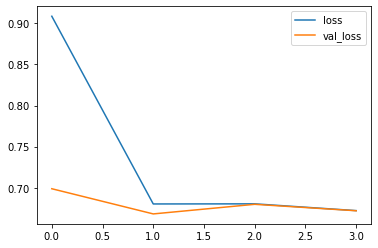

In [79]:
metrics[["loss", "val_loss"]].plot()

<AxesSubplot:>

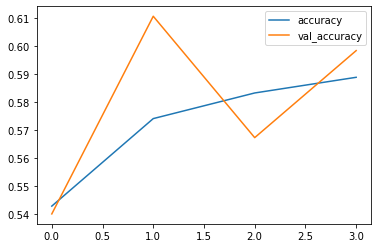

In [80]:
metrics[["accuracy", "val_accuracy"]].plot()

In [81]:
# depreciated
# model.evaluate_generator(test_gen)

C:\Users\rando\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6728535294532776, 0.5915384888648987]

In [83]:
model.evaluate(test_gen)

163/163 [==============================] - 9s 55ms/step - loss: 0.6701 - accuracy: 0.6054


[0.6701359748840332, 0.6053845882415771]

# Part 4 - Evaluating the Model

In [85]:
preds = model.predict(test_gen)

In [89]:
# this is creates a mask of True or False using rounding principals
# because the classes are 0 and 1, it can be compared to True and False in the classification report
predictions = preds > 0.5

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
# need to use the classes inside the generator
print(classification_report(test_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65      1300
           1       0.63      0.42      0.50      1300

    accuracy                           0.59      2600
   macro avg       0.60      0.59      0.57      2600
weighted avg       0.60      0.59      0.57      2600



In [96]:
confusion_matrix(test_gen.classes, predictions)

array([[984, 316],
       [760, 540]], dtype=int64)

In [97]:
from tensorflow.keras.preprocessing import image

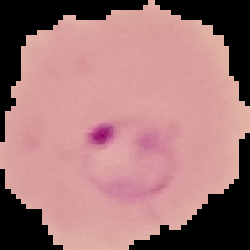

In [104]:
# can be reshaped by target_size
image.load_img(train_path + "parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png", target_size=(250, 250, 3))

In [102]:
type(image.load_img(train_path + "parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png"))

PIL.PngImagePlugin.PngImageFile